In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
data = pd.read_csv("C:/Users/SIPHI/Downloads/archive/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data_one_hot = pd.get_dummies(data)
data_one_hot = data_one_hot.apply(lambda x: x.astype(int))
data_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


In [4]:
x = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

In [5]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x[:1070]
y_train = y[:1070]
x_test = x[1070:]
y_test = y[1070:]
len(x_train), len(x_train), len(x_test), len(x_test)

(1070, 1070, 268, 268)

In [6]:
#Experiment 1 added more hidden units
#Set random seed
tf.random.set_seed(42)
#Create a model
model_exp1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_exp1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mse"])
#Fit the model
hist_exp1 = model_exp1.fit(x_train, y_train, epochs=100, verbose=0)

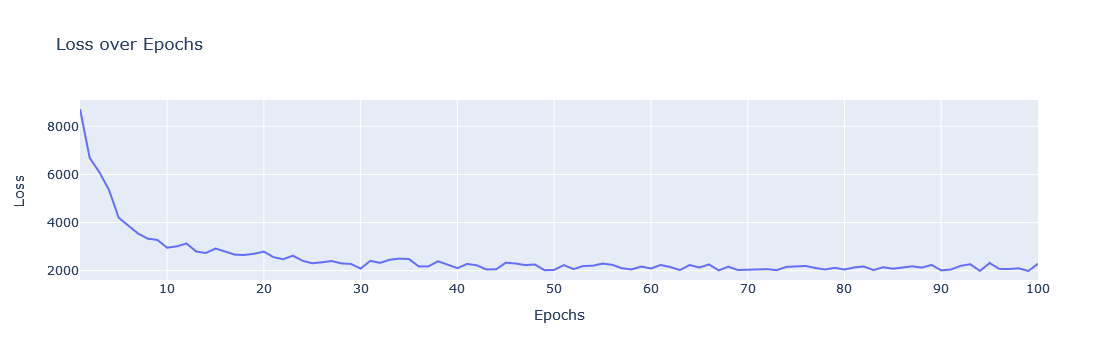

In [17]:
#pd.DataFrame(hist_exp1.history).plot()
#plt.ylabel("loss")
#plt.xlabely("epochs")
# Extract loss and epochs data from the history object
loss = hist_exp1.history['loss']
epochs = range(1, len(loss) + 1)

# Create a DataFrame
history_df = pd.DataFrame({'Epochs': epochs, 'Loss': loss})

# Use Plotly Express to create a line plot
fig = px.line(history_df, x='Epochs', y='Loss', title='Loss over Epochs')
fig.update_xaxes(title_text='Epochs')
fig.update_yaxes(title_text='Loss')

fig.show()

In [8]:
model_exp1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 2605.5671 - mse: 28585894.0000


[2605.567138671875, 28585894.0]

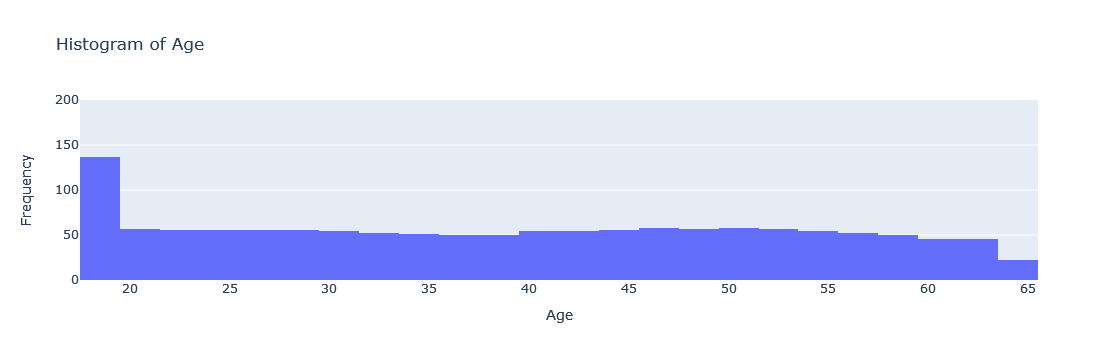

In [9]:
fig = px.histogram(x, x='age', title='Histogram of Age')
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Frequency', range=[0, 200])

fig.show()

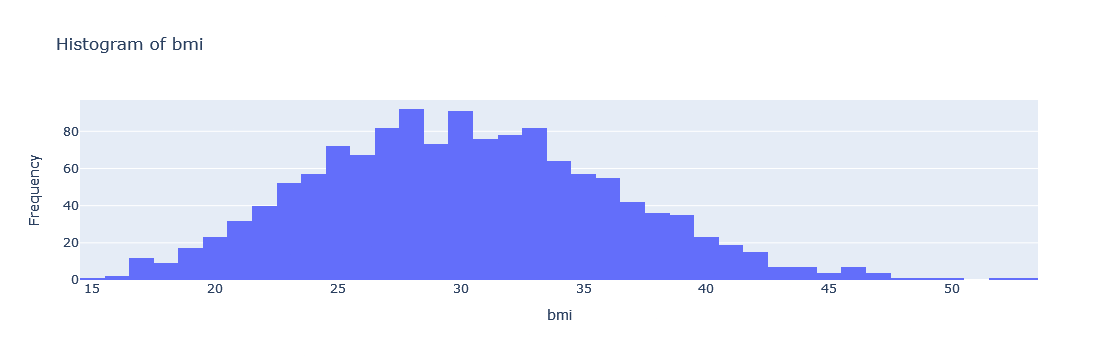

In [10]:
fig = px.histogram(x, x='bmi', title='Histogram of bmi')
fig.update_xaxes(title_text='bmi')
fig.update_yaxes(title_text='Frequency')

fig.show()

In [11]:
len(loss)

100

In [12]:
len(epochs)

100